# THỐNG KÊ MÔ TẢ TẬP DỮ LIỆU BỆNH TIỂU ĐƯỜNG

## Giới thiệu
Tập dữ liệu **Pima Indians Diabetes** được lấy từ [Kaggle](https://www.kaggle.com/code/vincentlugat/pima-indians-diabetes-eda-prediction-0-906).  
Dữ liệu chứa thông tin y tế của phụ nữ Pima Indian trên 21 tuổi, với mục tiêu dự đoán xem họ **có mắc bệnh tiểu đường hay không** (`Outcome`: 1 = Có, 0 = Không).

---

## Mục lục
1. Nạp dữ liệu  
2. Khám phá thông tin tổng quát  
3. Thống kê mô tả  
4. Kiểm tra dữ liệu thiếu và giá trị bất thường  
5. Trực quan hóa dữ liệu  
6. Kết luận  

---


In [2]:
# 1️NẠP DỮ LIỆU
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu CSV (đặt đúng đường dẫn file)
diabetes = pd.read_csv("diabetes.csv")

# Hiển thị 5 dòng đầu tiên
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Thông tin tổng quát về dữ liệu


In [3]:
# Kích thước, kiểu dữ liệu
print("Kích thước dữ liệu:", diabetes.shape)
diabetes.info()


Kích thước dữ liệu: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét:**
- Tập dữ liệu gồm **768 dòng và 9 cột**.
- Tất cả các thuộc tính đều là dạng số (`int64`, `float64`), thuận tiện cho mô hình hóa.
- Cột **Outcome** là biến mục tiêu (0: Không bị, 1: Bị tiểu đường).


## 3.Thống kê mô tả


In [5]:
# Thống kê mô tả các cột số
diabetes.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Nhận xét:**
- Một số cột có giá trị `0` không hợp lý như `Glucose`, `BloodPressure`, `BMI` (vì không thể bằng 0 trong thực tế).
- Giá trị trung bình của `Glucose` khoảng 120, cao hơn mức bình thường → mẫu dữ liệu có xu hướng thiên về nhóm bệnh nhân tiểu đường.


## 4. Kiểm tra dữ liệu thiếu và giá trị bất thường


In [6]:
# Kiểm tra giá trị thiếu
print("🔹 Số giá trị thiếu mỗi cột:")
print(diabetes.isnull().sum())

# Kiểm tra giá trị 0 ở các cột quan trọng
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    zero_count = (diabetes[col] == 0).sum()
    print(f"{col}: {zero_count} giá trị 0")


🔹 Số giá trị thiếu mỗi cột:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Glucose: 5 giá trị 0
BloodPressure: 35 giá trị 0
SkinThickness: 227 giá trị 0
Insulin: 374 giá trị 0
BMI: 11 giá trị 0


**Nhận xét:**
- Không có giá trị thiếu dạng `NaN`.
- Tuy nhiên, có nhiều giá trị **0 bất hợp lý** trong `Glucose`, `BloodPressure`, `BMI`, `SkinThickness`, `Insulin`.  
->> Cần **xử lý thay thế hoặc nội suy** trong giai đoạn tiền xử lý sau này.


## 5. Trực quan hóa dữ liệu
### 5.1. Phân bố biến mục tiêu (Outcome)


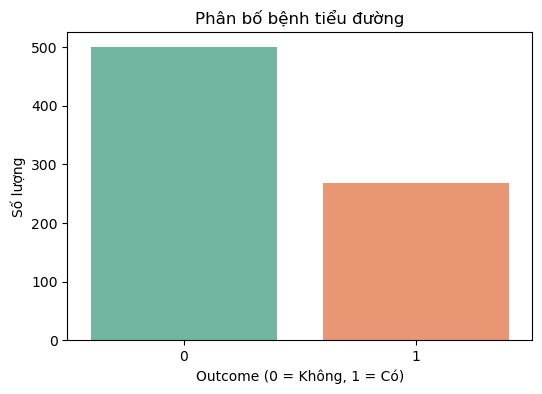

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

# Sửa lỗi: Thêm hue='Outcome' và legend=False
sns.countplot(x='Outcome', data=diabetes, hue='Outcome', palette='Set2', legend=False)

plt.title('Phân bố bệnh tiểu đường')
plt.xlabel('Outcome (0 = Không, 1 = Có)')
plt.ylabel('Số lượng')
plt.show()

**Nhận xét:**
- Dữ liệu **mất cân bằng nhẹ**: Số người không bị bệnh (0) nhiều hơn số người bị (1).


### 5.2. Phân bố các đặc trưng chính


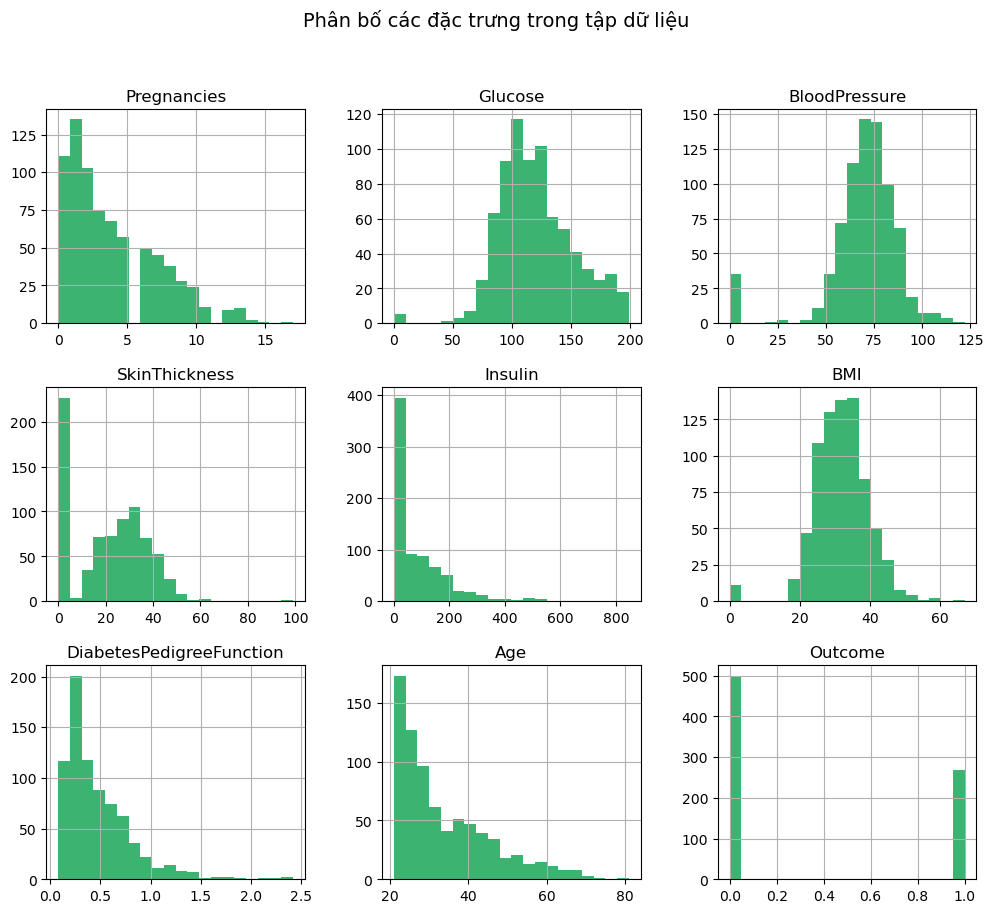

In [9]:
diabetes.hist(figsize=(12,10), bins=20, color='#3CB371')
plt.suptitle('Phân bố các đặc trưng trong tập dữ liệu', fontsize=14)
plt.show()


### Nhận Xét Phân Bố Các Đặc Trưng Trong Tập Dữ Liệu Tiểu Đường

Các biểu đồ histogram cho thấy hình thái phân bố của từng biến. Việc hiểu rõ sự phân bố là bước quan trọng để xác định phương pháp tiền xử lý dữ liệu phù hợp trước khi huấn luyện mô hình.

#### 1. Các Biến Có Dạng Phân Bố Chuẩn / Gần Chuẩn

Các biến này có hình chuông và ít bị lệch (skewed), phù hợp để sử dụng trực tiếp hoặc sau khi chuẩn hóa đơn giản (Standardization):

* **Glucose (Đường huyết):** Phân bố **gần chuẩn**, tập trung chủ yếu quanh mức 100-125.
* **BloodPressure (Huyết áp):** Phân bố **gần chuẩn**, tập trung mạnh quanh mức 70-80.
* **BMI (Chỉ số khối cơ thể):** Phân bố **gần chuẩn**, tập trung chủ yếu quanh mức 30-35.

#### 2. Các Biến Bị Lệch Phải (Right-Skewed)

Các biến này có đuôi kéo dài về phía giá trị lớn hơn và có nhiều giá trị bằng 0 hoặc rất nhỏ. Các biến này cần được xử lý (như biến đổi logarit) để giảm độ lệch trước khi đưa vào mô hình:

* **Pregnancies (Số lần mang thai):** Bị lệch phải, nhiều phụ nữ có số lần mang thai nhỏ.
* **Insulin:** Bị **lệch phải rất mạnh**, đa số các giá trị tập trung ở mức gần 0, nhưng có một đuôi dài về phía các giá trị insulin rất cao.
* **SkinThickness (Độ dày da):** Bị **lệch phải**, với nhiều giá trị ở mức thấp, có thể có giá trị 0 không hợp lý (cần kiểm tra).
* **DiabetesPedigreeFunction:** Bị lệch phải, cho thấy đa số bệnh nhân có điểm chức năng phả hệ thấp.
* **Age (Tuổi):** Bị lệch phải nhẹ, tập trung chủ yếu ở độ tuổi trẻ hơn ($20-30$).

#### 3. Biến Mục Tiêu (Outcome)

* **Outcome (Kết quả):** Là biến nhị phân, cho thấy dữ liệu bị **mất cân bằng (imbalanced)**.
    * **0 (Không mắc bệnh):** Chiếm số lượng lớn hơn nhiều (gần 500 mẫu).
    * **1 (Mắc bệnh):** Chiếm số lượng ít hơn (khoảng 250-300 mẫu).
    * **Kết luận:** Cần áp dụng kỹ thuật xử lý dữ liệu mất cân bằng (như SMOTE hoặc điều chỉnh trọng số lớp) trong quá trình huấn luyện mô hình.


### 5.3. Ma trận tương quan giữa các đặc trưng


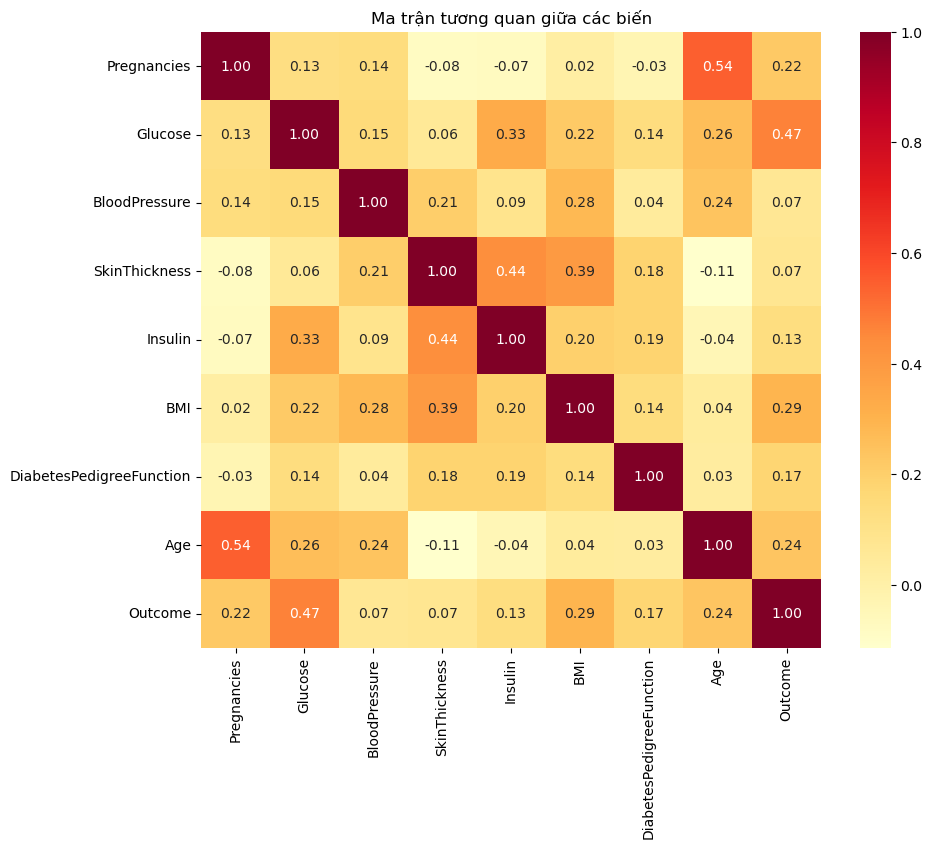

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(diabetes.corr(), annot=True, cmap='YlOrRd', fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()


### Đánh Giá Nhận Xét Ma Trận Tương Quan

**Các nhận xét kèm theo biểu đồ là chính xác và hợp lý.**

#### 1. Mối Quan Hệ Chủ Đạo với Bệnh (Outcome)

* **Glucose (0.47):** Có tương quan dương mạnh nhất với **Outcome** (nguy cơ mắc bệnh).
    * **Ý nghĩa:** Đây là kết quả sinh học quan trọng nhất: **Đường huyết càng cao thì khả năng mắc bệnh tiểu đường càng cao.**

* **BMI (0.29), Age (0.24), DiabetesPedigreeFunction (0.17):** Đều có tương quan dương với **Outcome**.
    * **Ý nghĩa:** Các yếu tố về **cân nặng, tuổi tác, và tiền sử gia đình** đều là những yếu tố nguy cơ quan trọng, đứng sau chỉ số đường huyết.

#### 2. Mối Quan Hệ Giữa Các Đặc Trưng Độc Lập

* **Pregnancies và Age (0.54):** Có tương quan dương mạnh nhất giữa các biến độc lập.
    * **Ý nghĩa:** Số lần mang thai có mối liên hệ mật thiết với tuổi tác, cho thấy chúng có thể đo lường cùng một khía cạnh.

* **SkinThickness và BMI (0.44), SkinThickness và Insulin (0.44):** Có tương quan dương mạnh.
    * **Ý nghĩa:** Độ dày da, chỉ số khối cơ thể và mức insulin có liên hệ chặt chẽ với nhau, phản ánh mức độ béo phì và sức khỏe trao đổi chất.

## 6. Kết luận

- Tập dữ liệu **Pima Indians Diabetes** gồm 768 mẫu, 8 đặc trưng đầu vào và 1 biến nhãn (`Outcome`).  
- Không có dữ liệu thiếu, nhưng có nhiều giá trị **0 không hợp lệ** cần xử lý trước khi huấn luyện mô hình.  
- Các đặc trưng có ảnh hưởng lớn đến kết quả bệnh gồm:
- `Glucose` (đường huyết)
- `BMI` (chỉ số khối cơ thể)
- `Age` (tuổi)
- `DiabetesPedigreeFunction` (yếu tố di truyền)

->> Dữ liệu đã sẵn sàng cho **bước tiền xử lý và phân loại bằng mô hình học máy** ở nhiệm vụ tiếp theo.
